In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
pd.set_option('max_rows', 500)




In [2]:
data = pd.read_csv('Gylfadottir_STR.csv')
initial = pd.read_csv("Gylfadottir_STR_init.csv")

//anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (28,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
//anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
data.head()

,filename,speaker,start,stop,length,word,previous,segment,following,position,...,Location,Name,Year,DOB,Corpus,nasal_bimodality,Phila_bimodality,Income,HS,HS_code
0,PH00-1-1-JStevens,JStevens,7.503000,7.623000,0.120000,SIX,sp,S,IH1,initial,...,South,John S,2000,1979,PNC,NaN,NaN,NaN,NaN,NaN
1,PH00-1-1-JStevens,JStevens,7.783000,7.992000,0.209000,SIX,K,S,sp,final,...,South,John S,2000,1979,PNC,NaN,NaN,NaN,NaN,NaN
2,PH00-1-1-JStevens,JStevens,8.212000,8.313000,0.101000,SEVEN,sp,S,EH1,initial,...,South,John S,2000,1979,PNC,NaN,NaN,NaN,NaN,NaN
3,PH00-1-1-JStevens,JStevens,24.688000,24.867001,0.179001,SEVENTY,AH1,S,EH1,initial,...,South,John S,2000,1979,PNC,NaN,NaN,NaN,NaN,NaN
4,PH00-1-1-JStevens,JStevens,35.411999,35.452999,0.041000,FIRST,ER1,S,T,medial,...,South,John S,2000,1979,PNC,NaN,NaN,NaN,NaN,NaN


In [5]:
data.dtypes

filename                object
speaker                 object
start                  float64
stop                   float64
length                 float64
word                    object
previous                object
segment                 object
following               object
position                object
cog                    float64
maxcog                 float64
subject                 object
street                  object
STR                       bool
STRcount               float64
following_frontness     object
following_height        object
following_hf            object
meancog                float64
stdevcog               float64
normalizedmean         float64
Subj                    object
Age                      int64
Sex                     object
Eth                     object
EdYears                float64
Nbrhood                 object
Location                object
Name                    object
Year                     int64
DOB                    float64
Corpus  

#Plot

In [6]:
initial.set_index(['subject','segment'], drop=False, inplace=True)

In [7]:
toplot = initial.groupby(['subject','segment'])[['normalizedmean','meancog',"HS_code", 'DOB','Phila_bimodality','nasal_bimodality','Sex', 'segment','Corpus','EdYears','Location','Income']].first()
toplot_all = data.groupby(['subject','segment'])[['normalizedmean','meancog',"HS_code", 'DOB','Phila_bimodality','nasal_bimodality','Sex', 'segment','Corpus','EdYears','Location','Income']].first()
data_str = data[data.segment=="STR"]
data_sh = data[data.segment=="SH"]
toplot_str = data_str.groupby('subject')[['normalizedmean','meancog',"HS_code", 'DOB','Phila_bimodality','nasal_bimodality','Sex','Corpus','EdYears','Location','Income']].first()
toplot_sh = data_sh.groupby('subject')[['normalizedmean','meancog',"HS_code", 'DOB','Phila_bimodality','nasal_bimodality','Sex','Corpus','EdYears','Location','Income']].first()
toplot_str['diff'] = toplot_str.normalizedmean - toplot_sh.normalizedmean

In [8]:
toplot.to_csv("toplot.csv",index = False)
toplot_all.to_csv("toplot_all.csv",index = False)
toplot_str.to_csv("toplot_diff.csv",index = False)


##now plot with R magic

In [5]:
%load_ext rpy2.ipython


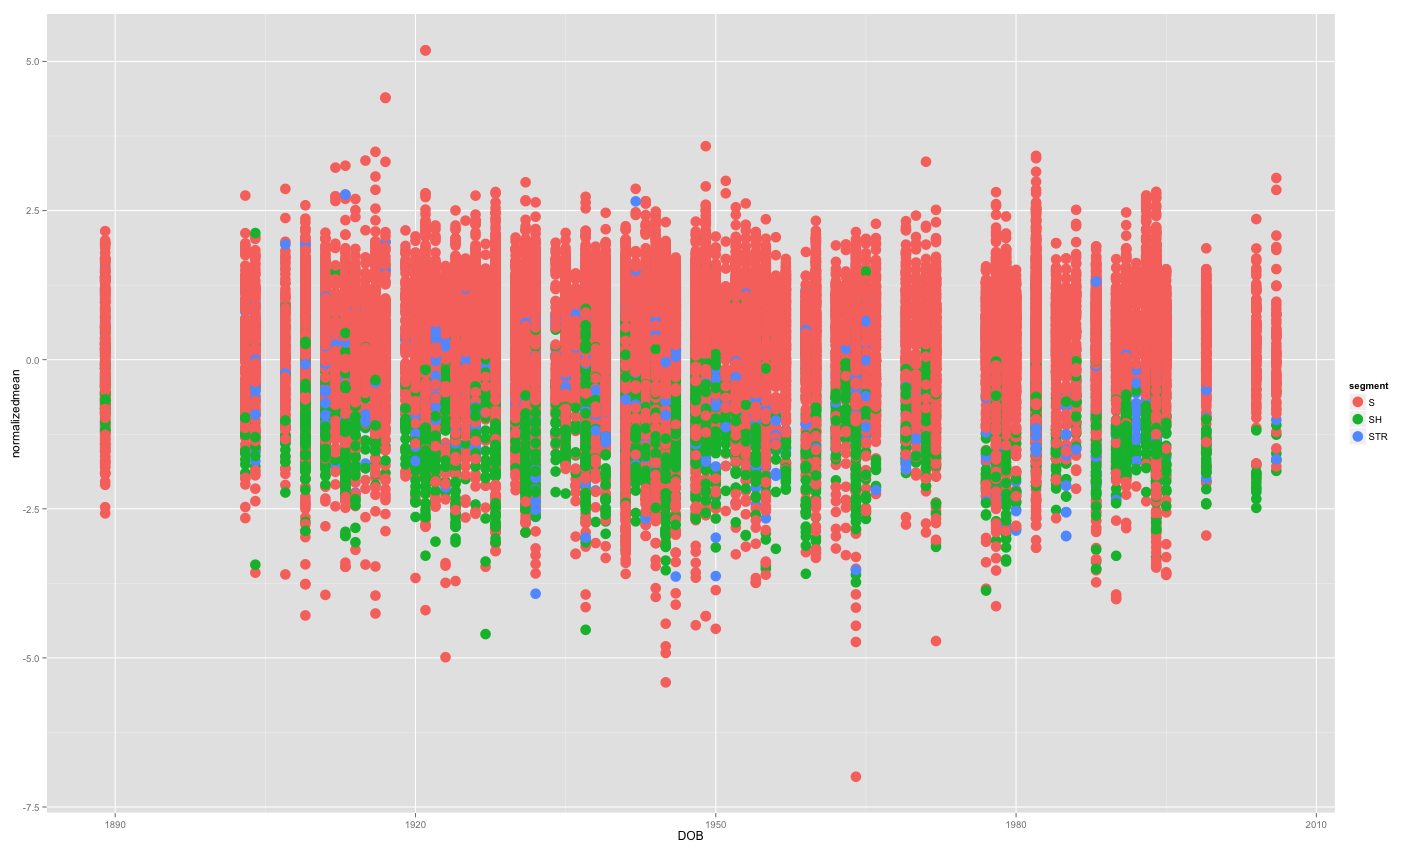

In [6]:
%%R -i initial -w 50 -h 30 -u cm

library(ggplot2)

plot_init_normalized_by_dob <- ggplot(data = initial, aes(x = DOB, y = normalizedmean, colour = segment)) +
  geom_point(size=5)
print(plot_init_normalized_by_dob)